In [2]:
import gc
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [3]:
%matplotlib inline

In [4]:
!ls '../input'

lanl-features.zip      test-andrew	train		      unarch
sample_submission.csv  test-andrew.zip	train-andrew.csv.zip
test		       test.zip		train.csv.zip


In [5]:
train_df = pd.read_csv('../input/train/train.csv', nrows=150000)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
acoustic_data      150000 non-null int64
time_to_failure    150000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.3 MB


In [8]:
train_df.describe()

,acoustic_data,time_to_failure
count,150000.000000,150000.000000
mean,4.884113,1.450182
std,5.101106,0.011248
min,-98.000000,1.430797
25%,3.000000,1.440398
50%,5.000000,1.449999
75%,7.000000,1.459599
max,104.000000,1.469100


In [7]:
train_df.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [9]:
train_df.tail()

,acoustic_data,time_to_failure
149995,1,1.430797
149996,6,1.430797
149997,6,1.430797
149998,2,1.430797
149999,0,1.430797


In [10]:
acoustic_data_df = train_df[train_df.columns.drop('time_to_failure')].astype(np.int32)

In [11]:
time_to_failure_df = train_df[train_df.columns.drop('acoustic_data')].astype(np.float32)

In [12]:
compressed_train_df = pd.concat([acoustic_data_df, time_to_failure_df], axis=1)

In [13]:
compressed_train_df.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [14]:
compressed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
acoustic_data      150000 non-null int32
time_to_failure    150000 non-null float32
dtypes: float32(1), int32(1)
memory usage: 1.1 MB


In [15]:
train_df = compressed_train_df

In [16]:
train_df.shape

(150000, 2)

In [ ]:
#del acoustic_data_df 
#del time_to_failure_df
gc.collect()

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
acoustic_data      150000 non-null int32
time_to_failure    150000 non-null float32
dtypes: float32(1), int32(1)
memory usage: 1.1 MB


In [18]:
unique_acoustic_data = train_df['acoustic_data'].unique()

In [19]:
unique_time_to_failure = train_df['time_to_failure'].unique()

In [20]:
unique_acoustic_data.shape

(158,)

In [21]:
unique_time_to_failure.shape

(1421,)

In [22]:
train_df.shape

(150000, 2)

In [23]:
fig = plt.figure(figsize=(24, 18))

<Figure size 1728x1296 with 0 Axes>

In [24]:
ax = fig.add_subplot(111)

In [25]:
ax.set_xlim(train_df['acoustic_data'].min(), train_df['acoustic_data'].max())

(-98, 104)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb98f0d98d0>]],
      dtype=object)

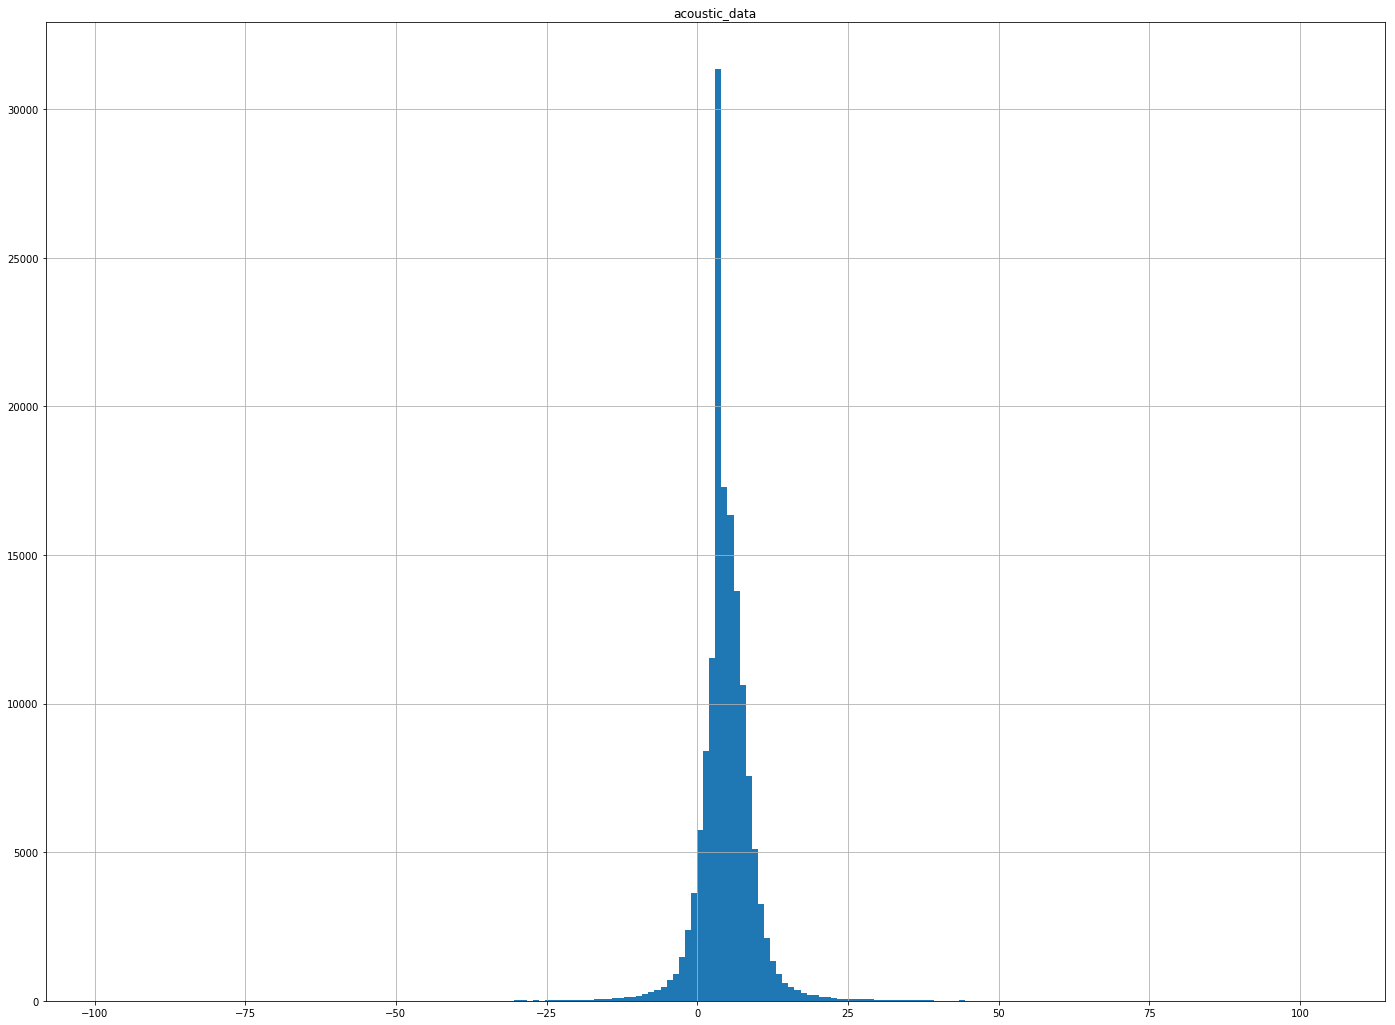

In [26]:
train_df.hist(column='acoustic_data', bins=200, figsize=(24, 18))

In [27]:
train_df['acoustic_data'].count()

150000

In [28]:
#grouped_train_df_by_acoustic = train_df[train_df.columns.drop('time_to_failure')].groupby('acoustic_data')
grouped_train_series_by_acoustic = train_df['acoustic_data'].groupby(by=train_df['acoustic_data'])

In [29]:
#dir(grouped_train_series_by_acoustic)

In [30]:
count_train_series_acoustic = grouped_train_series_by_acoustic.count()

In [31]:
print(count_train_series_acoustic.memory_usage())

2528


In [32]:
count_train_series_acoustic.shape

(158,)

In [33]:
count_train_series_acoustic.head()

acoustic_data
-98    1
-95    1
-92    1
-91    1
-85    1
Name: acoustic_data, dtype: int64

In [34]:
count_train_series_acoustic.tail()

acoustic_data
89     1
93     1
98     1
102    1
104    1
Name: acoustic_data, dtype: int64

In [ ]:
#count_train_series_acoustic[-5008]

In [35]:
count_acoustic_more_20 = count_train_series_acoustic[count_train_series_acoustic > 20]

In [36]:
print(count_acoustic_more_20.memory_usage())

896


In [37]:
count_acoustic_more_20.shape

(56,)

In [38]:
print(count_acoustic_more_20.min())
print(count_acoustic_more_20.max())

22
17283


In [ ]:
#fig = plt.figure(figsize=(24, 18))
#ax = fig.add_subplot(111)
#ax.set_xlim(count_acoustic_more_20.min(), count_acoustic_more_20.max())

In [39]:
count_acoustic_more_20.mode()

0    22
dtype: int64

In [40]:
count_acoustic_more_20.tail()

acoustic_data
29    51
30    35
31    22
33    23
34    22
Name: acoustic_data, dtype: int64

In [41]:
#count_acoustic_more_20[73883469]

In [42]:
index_count_acoustic_more_20 = count_acoustic_more_20.index

In [43]:
print(index_count_acoustic_more_20[:10])
print(index_count_acoustic_more_20[-10:])

Int64Index([-23, -21, -20, -19, -18, -17, -16, -15, -14, -13], dtype='int64', name='acoustic_data')
Int64Index([24, 25, 26, 27, 28, 29, 30, 31, 33, 34], dtype='int64', name='acoustic_data')


In [44]:
print(index_count_acoustic_more_20.min())
print(index_count_acoustic_more_20.max())

-23
34


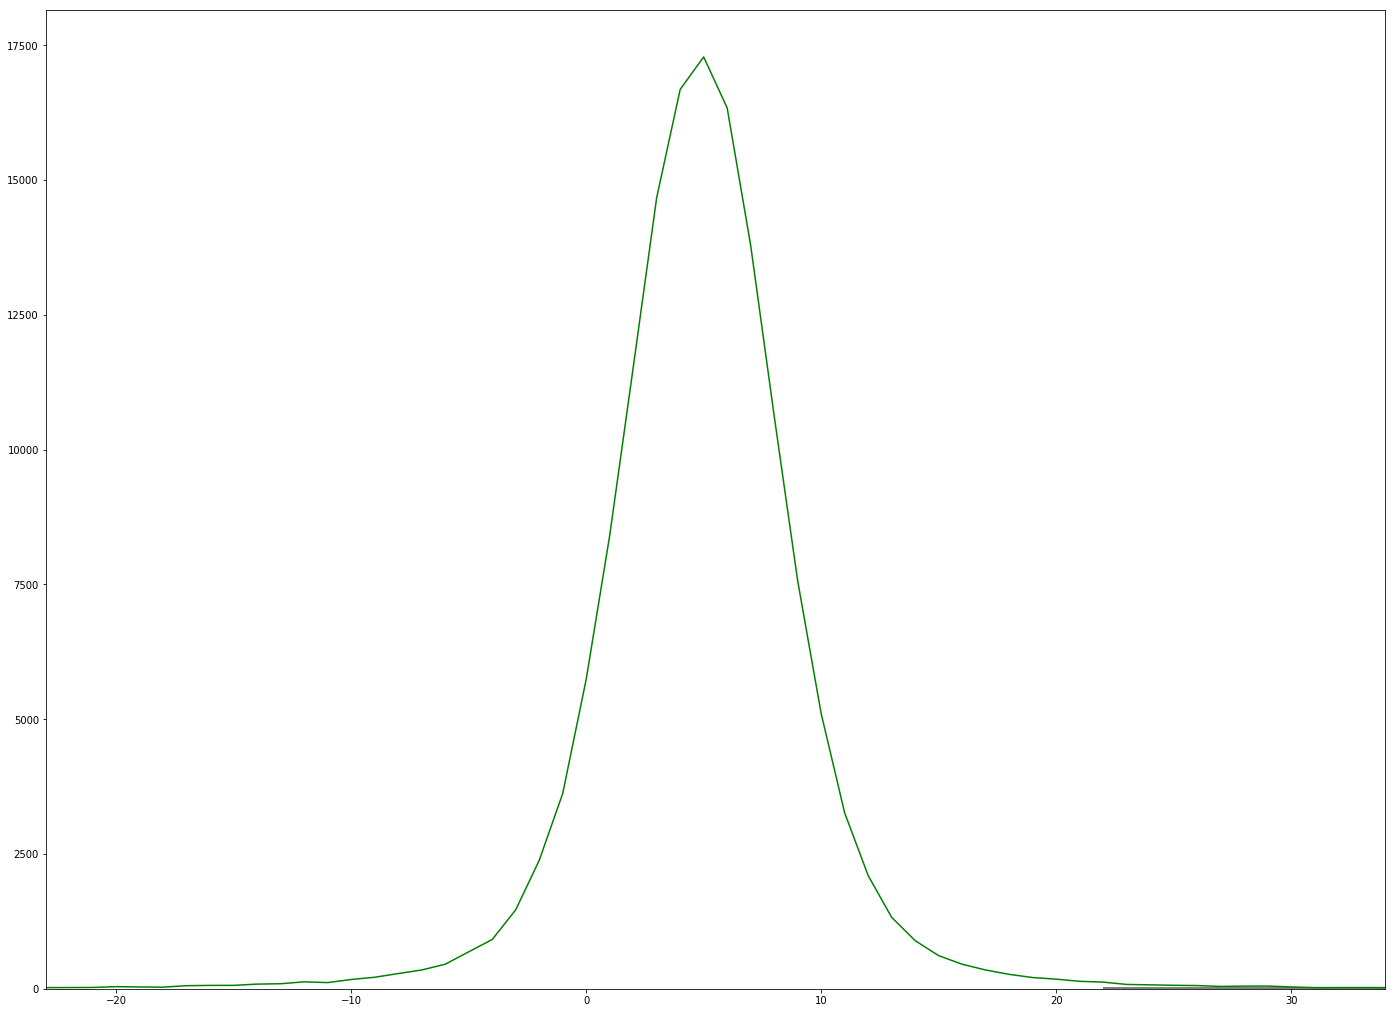

In [45]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.hist(count_acoustic_more_20, color='gray', bins=60)
plt.show()

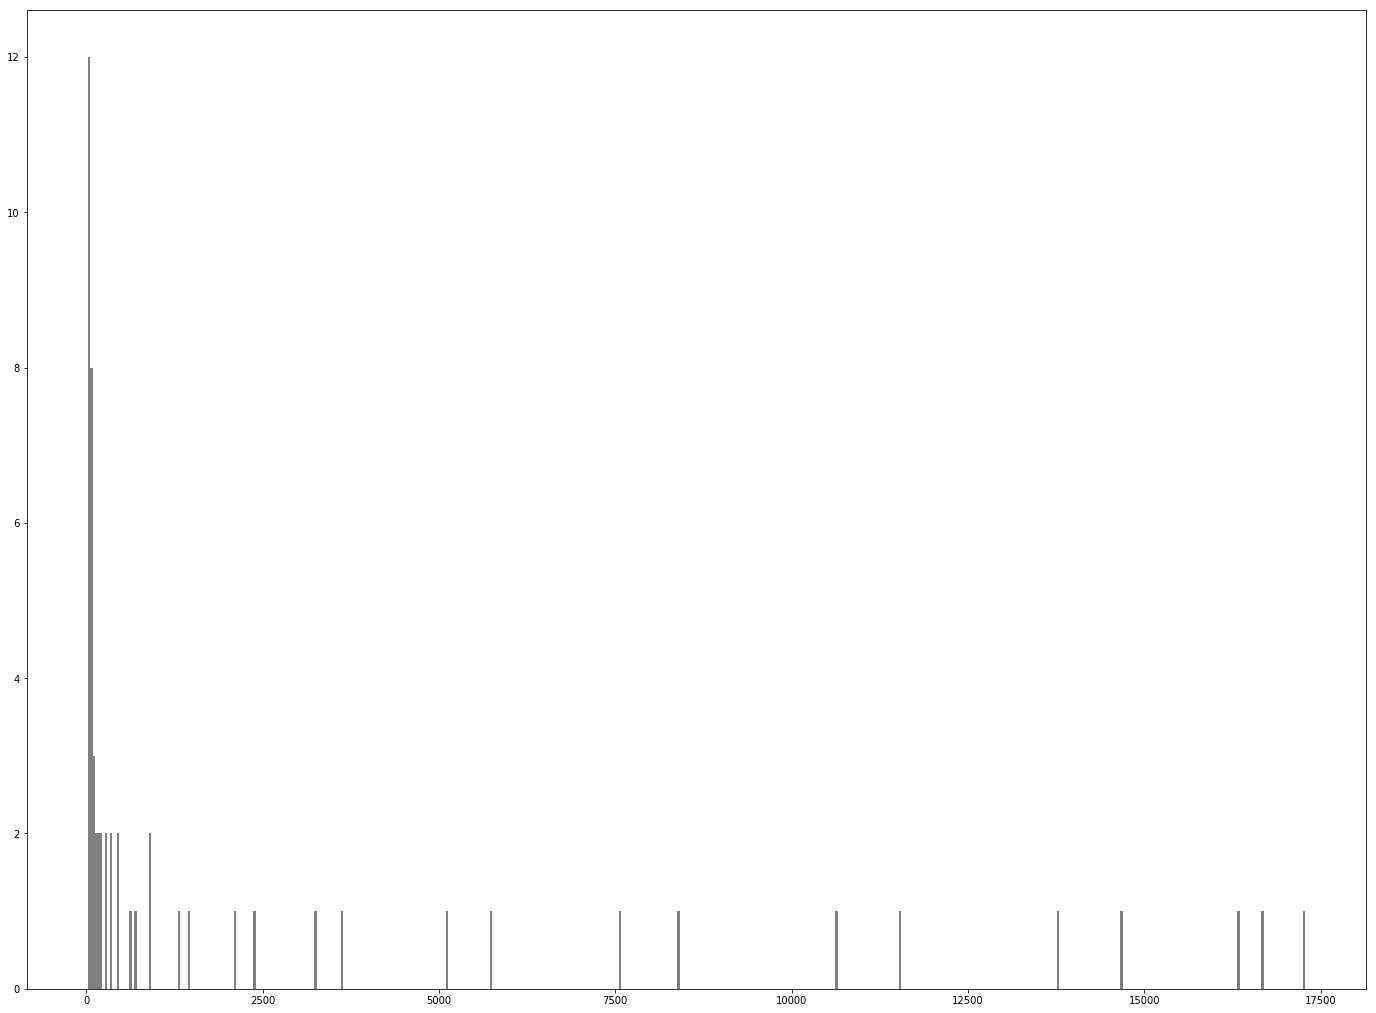

In [46]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
#ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.hist(count_acoustic_more_20, color='gray', bins=500)
plt.show()

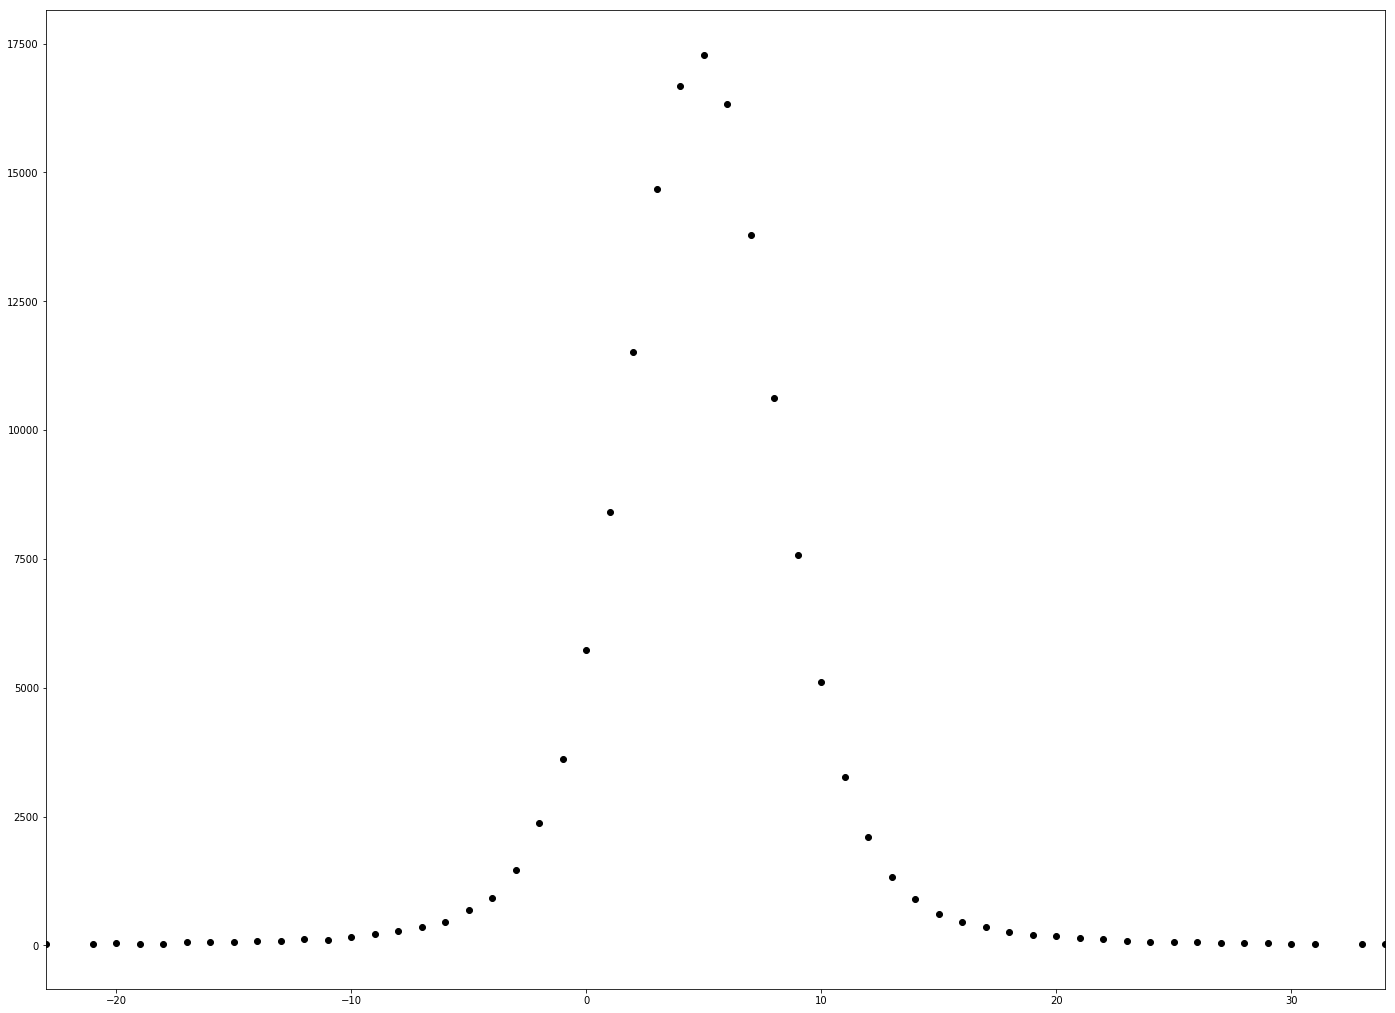

In [47]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
ax.set_xlim(index_count_acoustic_more_20.min(), index_count_acoustic_more_20.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.scatter(index_count_acoustic_more_20, count_acoustic_more_20, color='black')
plt.show()

In [48]:
print(count_acoustic_more_20.unique())

[   22    25    40    34    30    58    63    64    87    94   129   115
   173   214   283   349   456   686   914  1465  2382  3622  5741  8406
 11521 14674 16680 17283 16337 13788 10627  7568  5106  3263  2101  1325
   894   615   268   209   179   139   124    81    73    65    60    44
    50    51    35    23]


In [49]:
print(count_acoustic_more_20.unique().shape)
print(count_acoustic_more_20.shape)

(52,)
(56,)


In [50]:
count_acoustic_more_40 = count_train_series_acoustic[count_train_series_acoustic > 40]

In [51]:
print(count_acoustic_more_40.unique().shape)
print(count_acoustic_more_40.shape)
print(count_acoustic_more_40.unique())

(45,)
(47,)
[   58    63    64    87    94   129   115   173   214   283   349   456
   686   914  1465  2382  3622  5741  8406 11521 14674 16680 17283 16337
 13788 10627  7568  5106  3263  2101  1325   894   615   268   209   179
   139   124    81    73    65    60    44    50    51]


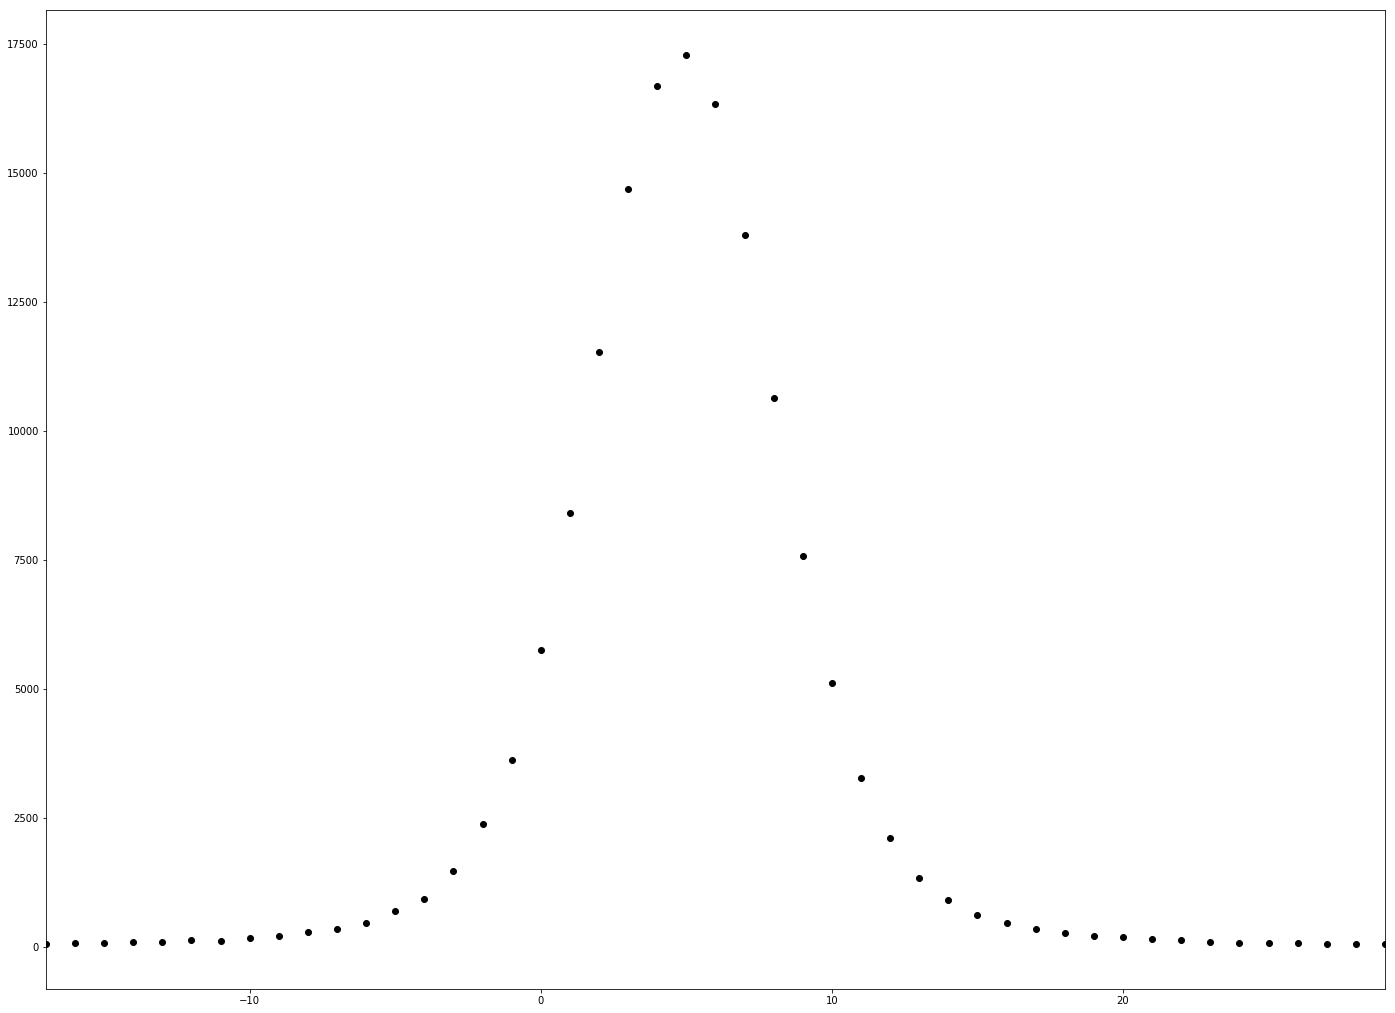

In [52]:
fig = plt.figure(figsize=(24, 18))
ax = fig.add_subplot(111)
ax.set_xlim(count_acoustic_more_40.index.min(), count_acoustic_more_40.index.max())
#ax.hist(count_acoustic_more_20, bins=100, color='gray')
#ax.plot(index_count_acoustic_more_20, count_acoustic_more_20, color='green')
ax.scatter(count_acoustic_more_40.index, count_acoustic_more_40, color='black')
plt.show()

In [53]:
print("count_train_series_acoustic.min(): ", count_train_series_acoustic.min())
print("count_train_series_acoustic.max(): ", count_train_series_acoustic.max())
print("count_train_df_acoustic.index.min(): ", count_train_series_acoustic.index.min())
print("count_train_df_acoustic.index.max(): ", count_train_series_acoustic.index.max())
print("count_train_series_acoustic.mode(): ", count_train_series_acoustic.mode())
print("count_train_series_acoustic.median(): ", count_train_series_acoustic.median())
print("count_train_series_acoustic.mean(): ", count_train_series_acoustic.mean())
#print("count_train_series_acoustic.index.mode(): ", count_train_series_acoustic.index.mode())
#print("count_train_series_acoustic.index.median(): ", count_train_series_acoustic.index.median())
#print("count_train_series_acoustic.index.mean(): ", count_train_series_acoustic.index.mean())

count_train_series_acoustic.min():  1
count_train_series_acoustic.max():  17283
count_train_df_acoustic.index.min():  -98
count_train_df_acoustic.index.max():  104
count_train_series_acoustic.mode():  0    1
dtype: int64
count_train_series_acoustic.median():  8.0
count_train_series_acoustic.mean():  949.367088607595


In [54]:
count_train_series_acoustic.mode()

0    1
dtype: int64

In [55]:
count_train_series_acoustic[count_train_series_acoustic == 0].shape

(0,)

In [56]:
count_train_series_acoustic[count_train_series_acoustic == 1].shape

(34,)

In [57]:
#count_train_series_acoustic.mode?

In [58]:
count_train_series_acoustic.head()

acoustic_data
-98    1
-95    1
-92    1
-91    1
-85    1
Name: acoustic_data, dtype: int64

In [59]:
gc.collect()

31490

In [60]:
train_df.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [61]:
zero_time_df = train_df[train_df['time_to_failure'] == 0]

In [62]:
zero_time_df.shape

(0, 2)

In [63]:
train_df['time_to_failure'].min()

1.4307972

In [64]:
zero_time_df =  train_df[train_df['time_to_failure'] == train_df['time_to_failure'].min()]

In [65]:
zero_time_df.shape

(85, 2)

In [66]:
zero_time_df =  train_df[train_df['time_to_failure'] <= 0.0001]

In [67]:
zero_time_df.index

Int64Index([], dtype='int64')

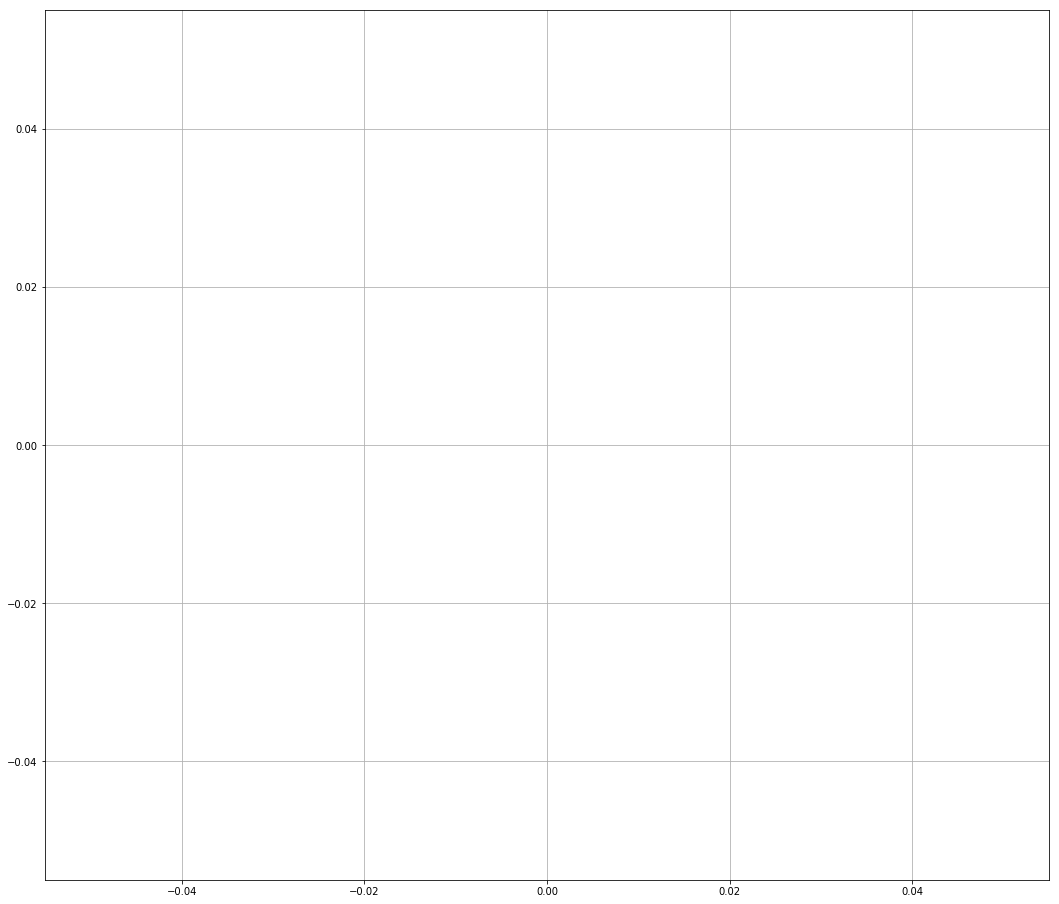

In [68]:
plt.figure(figsize=(18, 16))
plt.plot(zero_time_df['acoustic_data'].values, zero_time_df['time_to_failure'].values)
plt.grid()
plt.show()

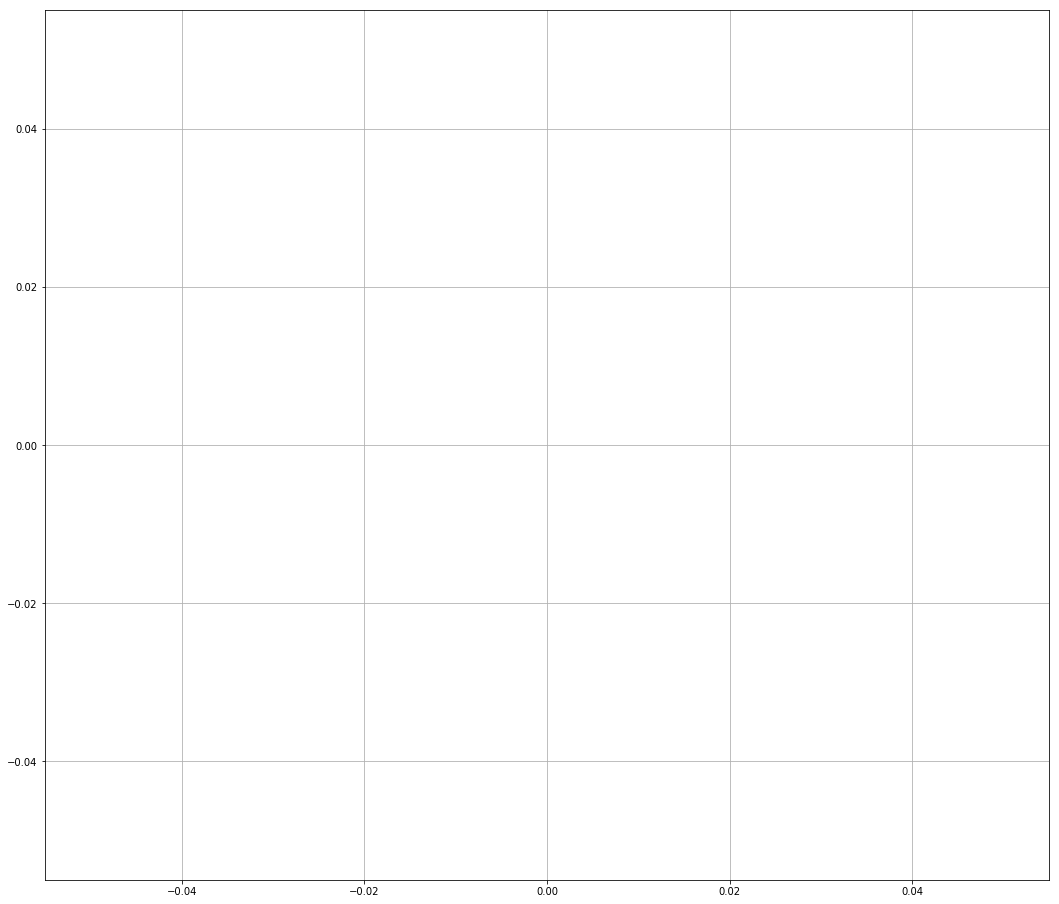

In [69]:
plt.figure(figsize=(18, 16))
plt.plot(train_df[train_df['time_to_failure'] <= 0.01].index, train_df[train_df['time_to_failure'] <= 0.01]['acoustic_data'].values)
plt.grid()
plt.show()

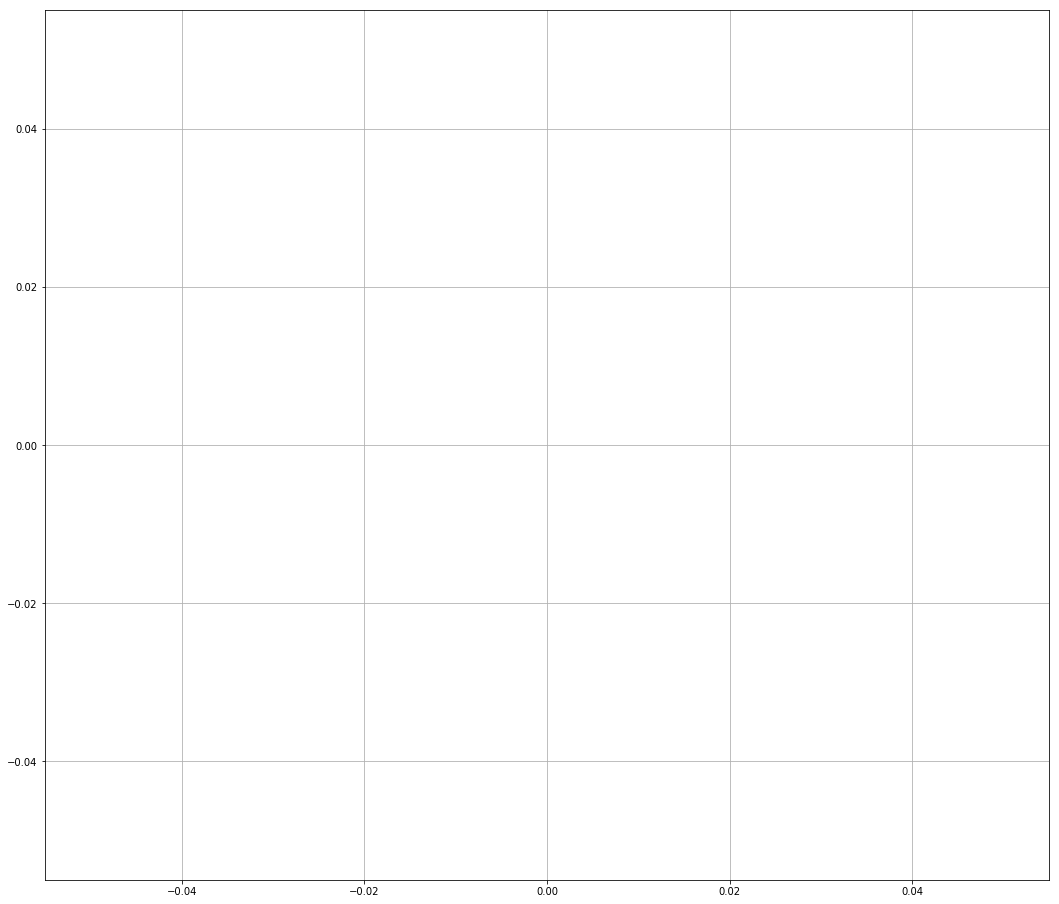

In [70]:
plt.figure(figsize=(18, 16))
plt.plot(train_df[train_df['time_to_failure'] <= 0.01].index, train_df[train_df['time_to_failure'] <= 0.01]['time_to_failure'].values)
plt.grid()
plt.show()

In [ ]:
np.diff?

In [71]:
time_to_failure_diffs = np.diff(train_df['time_to_failure']).astype(np.float32)

In [72]:
time_to_failure_diffs.shape[0] == train_df.shape[0]

False

In [73]:
time_to_failure_diffs.shape

(149999,)

In [74]:
train_df.shape

(150000, 2)

In [75]:
print(time_to_failure_diffs[:10])
print(time_to_failure_diffs[-10:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [76]:
time_to_failure_diffs = np.concatenate((time_to_failure_diffs, [0])).astype(np.float32)

In [77]:
time_to_failure_diffs.shape

(150000,)

In [78]:
train_df['time_to_failure_diffs'] = time_to_failure_diffs

In [79]:
train_df.head()

,acoustic_data,time_to_failure,time_to_failure_diffs
0,12,1.4691,0.0
1,6,1.4691,0.0
2,8,1.4691,0.0
3,5,1.4691,0.0
4,8,1.4691,0.0


In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
acoustic_data            150000 non-null int32
time_to_failure          150000 non-null float32
time_to_failure_diffs    150000 non-null float32
dtypes: float32(2), int32(1)
memory usage: 1.7 MB


In [81]:
del time_to_failure_diffs
gc.collect()

6287

In [82]:
(train_df['time_to_failure_diffs'] == 0).count()

150000

In [83]:
(train_df['time_to_failure_diffs'] == np.inf).any()

False

In [84]:
(train_df['time_to_failure_diffs'] == np.nan).any()

False

In [85]:
((train_df['time_to_failure_diffs'] != 0.0).astype(np.int32)).sum()

1420

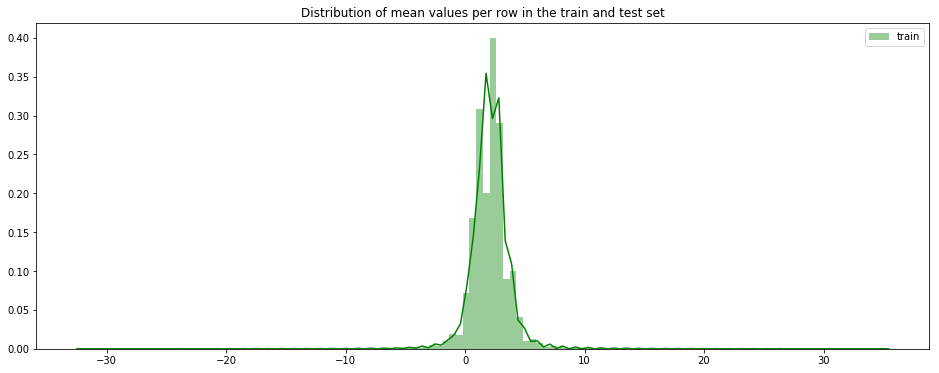

In [86]:
plt.figure(figsize=(16,6))
features = train_df.columns.values
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
#sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

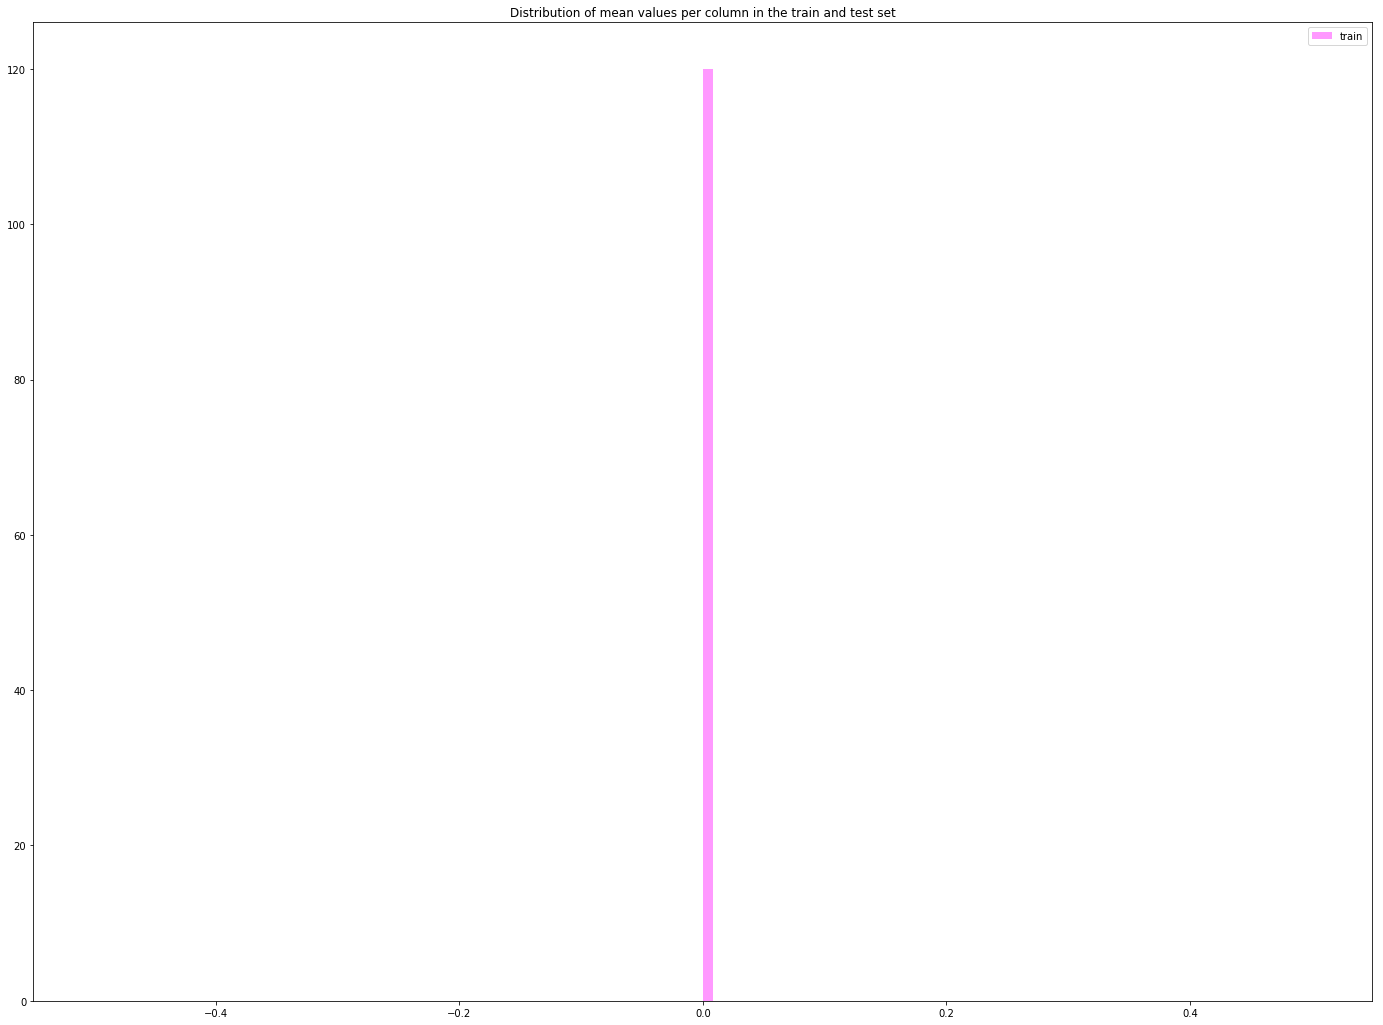

In [87]:
features = train_df.columns.values[2:202]
plt.figure(figsize=(24, 18))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0), color="magenta", kde=True,bins=120, label='train')
#sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [88]:
unique_acoustic_data_1 = train_df['acoustic_data'].unique()

In [89]:
type(unique_acoustic_data_1)

numpy.ndarray

In [90]:
unique_acoustic_data_1[:5]

array([12,  6,  8,  5,  9])

In [92]:
type(acoustic_data_df)

pandas.core.frame.DataFrame

In [93]:
count_acoustic_data = acoustic_data_df.groupby('acoustic_data').count()

In [94]:
type(count_acoustic_data)

pandas.core.frame.DataFrame

In [95]:
count_acoustic_data.head()

""
acoustic_data
-98
-95
-92
-91
-85


In [96]:
type(count_train_series_acoustic)

pandas.core.series.Series

In [97]:
count_train_series_acoustic.head()

acoustic_data
-98    1
-95    1
-92    1
-91    1
-85    1
Name: acoustic_data, dtype: int64

In [98]:
sorted_count_acoustic_data = count_train_series_acoustic.sort_values()

In [99]:
sorted_count_acoustic_data.head()

acoustic_data
-98    1
 58    1
 65    1
 67    1
 68    1
Name: acoustic_data, dtype: int64

In [100]:
sorted_count_acoustic_data.tail()

acoustic_data
7    13788
3    14674
6    16337
4    16680
5    17283
Name: acoustic_data, dtype: int64

In [104]:
sorted_count_acoustic_data.mode()

0    1
dtype: int64

In [105]:
train_df['acoustic_data'].mode()

0    5
dtype: int32

In [106]:
train_df.mode?

In [107]:
acoustic_data_df.shape

(150000, 1)

In [108]:
acoustic_data_series = train_df['acoustic_data']

In [109]:
type(acoustic_data_series)

pandas.core.series.Series

In [119]:
most_frequent_values = acoustic_data_series.count()

In [120]:
most_frequent_values

150000

In [127]:
value_counts = acoustic_data_series.value_counts()

In [128]:
type(value_counts)

pandas.core.series.Series

In [129]:
value_counts.head()

5    17283
4    16680
6    16337
3    14674
7    13788
Name: acoustic_data, dtype: int64

In [130]:
value_counts.index[0]

5

In [132]:
type(value_counts.head(1))

pandas.core.series.Series

In [133]:
value_counts.items()

In [135]:
for item in value_counts.iteritems():
    print(item)

(5, 17283)
(4, 16680)
(6, 16337)
(3, 14674)
(7, 13788)
(2, 11521)
(8, 10627)
(1, 8406)
(9, 7568)
(0, 5741)
(10, 5106)
(-1, 3622)
(11, 3263)
(-2, 2382)
(12, 2101)
(-3, 1465)
(13, 1325)
(-4, 914)
(14, 894)
(-5, 686)
(15, 615)
(16, 456)
(-6, 456)
(17, 349)
(-7, 349)
(-8, 283)
(18, 268)
(-9, 214)
(19, 209)
(20, 179)
(-10, 173)
(21, 139)
(-12, 129)
(22, 124)
(-11, 115)
(-13, 94)
(-14, 87)
(23, 81)
(24, 73)
(25, 65)
(-15, 64)
(-16, 63)
(26, 60)
(-17, 58)
(29, 51)
(28, 50)
(27, 44)
(-20, 40)
(30, 35)
(-19, 34)
(-18, 30)
(-21, 25)
(33, 23)
(31, 22)
(-23, 22)
(34, 22)
(32, 20)
(-24, 20)
(-22, 19)
(-25, 19)
(39, 19)
(35, 17)
(-30, 17)
(37, 15)
(-29, 14)
(38, 14)
(44, 14)
(36, 14)
(-27, 13)
(-26, 10)
(-33, 10)
(-28, 9)
(45, 9)
(-35, 9)
(-32, 9)
(40, 9)
(47, 8)
(42, 8)
(41, 8)
(-40, 8)
(-34, 7)
(-53, 7)
(-36, 7)
(-37, 7)
(-31, 7)
(43, 6)
(54, 6)
(-44, 5)
(-39, 5)
(49, 5)
(51, 5)
(52, 5)
(53, 5)
(60, 5)
(-47, 5)
(48, 4)
(-54, 4)
(57, 4)
(-45, 4)
(63, 4)
(50, 4)
(86, 4)
(46, 4)
(-52, 3)
(-48, 3)
(55